### Market Segmentation 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('Market Segmentation.csv')
data.head(5)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


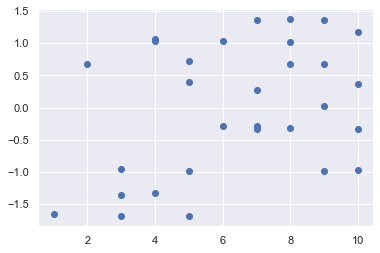

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])

In [6]:
x=data.copy()

In [14]:
kmeans=KMeans(2)

In [15]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [17]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1])

In [19]:
x['Clusters']=identified_clusters
x

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


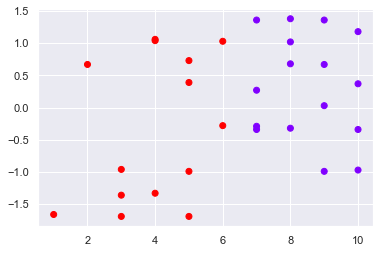

In [20]:
plt.scatter(x['Satisfaction'],x['Loyalty'],c=x['Clusters'],cmap='rainbow')

### Standardize Variables

In [22]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ,  1.06904497],
       [-0.15523011, -0.28117124,  1.06904497],
       [-0.54330537, -0.99160391,  1.06904497],
       [ 0.23284516, -0.29117733, -0.93541435],
       [-0.93138063,  1.05964534,  1.06904497],
       [-2.09560642, -1.6620122 ,  1.06904497],
       [ 1.39707095, -0.97159172, -0.93541435],
       [ 0.62092042, -0.32119561, -0.93541435],
       [ 0.62092042,  1.01962097, -0.93541435],
       [ 0.62092042,  0.67941378, -0.93541435],
       [ 1.39707095, -0.3412078 , -0.93541435],
       [-0.54330537,  0.38923705,  1.06904497],
       [-0.54330537, -1.69203048,  1.06904497],
       [-1.70753116,  0.66940768,  1.06904497],
       [ 0.23284516,  0.26916393, -0.93541435],
       [ 1.00899568,  1.35982816, -0.93541435],
       [ 0.62092042,  1.37984035, -0.93541435],
       [ 0.23284516,  1.35982816, -0.93541435],
       [ 0.23284516, -0.3412078 , -0.93541435],
       [ 1.00899568,  0.66940768, -0.93541435],
       [ 1.39707095,  1.17971847, -0.935

In [25]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[90.0,
 33.80381878635423,
 18.450179051702854,
 10.882052589855043,
 8.915030879032287,
 7.23154749979742,
 6.065393055826507,
 4.9784927797483,
 4.1823753654086335]

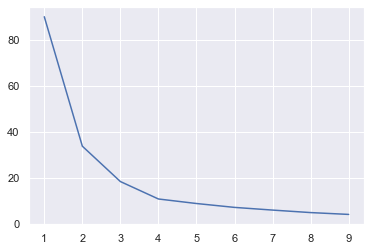

In [27]:
number_of_clusters=range(1,10)
plt.plot(number_of_clusters,wcss)


In [36]:
kmeans_new=KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)

In [37]:
cluster_new

,Satisfaction,Loyalty,Clusters,cluster_pred
0,4,-1.33,1,1
1,6,-0.28,1,3
2,5,-0.99,1,1
3,7,-0.29,0,0
4,4,1.06,1,3
5,1,-1.66,1,1
6,10,-0.97,0,0
7,8,-0.32,0,0
8,8,1.02,0,2
9,8,0.68,0,2


Text(0, 0.5, 'Loyalty')

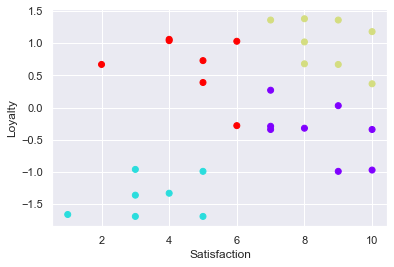

In [38]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')